In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv('insurance_pre.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [5]:
dataset = pd.get_dummies(dataset, dtype=int, drop_first=True)

In [6]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [7]:
independent=dataset[['age','bmi', 'children','sex_male','smoker_yes']]
dependent=dataset[['charges']]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [12]:
X_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [13]:
X_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', splitter='random',max_features=None)
regressor=regressor.fit(X_train,y_train)

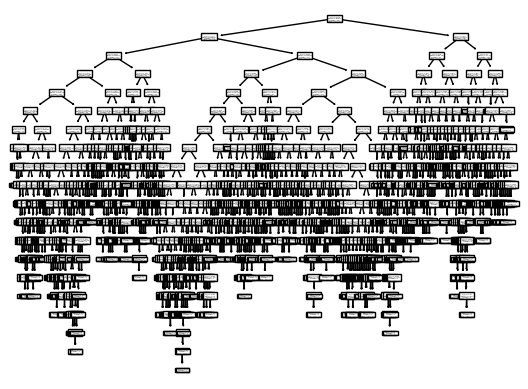

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
y_pred

array([ 9144.565   ,  8930.93455 , 47462.894   , 12981.3457  ,
        9264.797   , 11737.84884 ,  2196.4732  , 10560.4917  ,
        7281.5056  ,  5209.57885 ,  6414.178   , 10848.1343  ,
        6849.026   ,  4571.41305 , 18246.4955  , 10600.5483  ,
       12142.5786  ,  3292.52985 ,  6203.90175 , 18648.4217  ,
       24869.8368  , 11881.9696  ,  9625.92    , 21774.32215 ,
        1682.597   ,  3875.7341  ,  3176.8159  ,  8538.28845 ,
        3757.8448  ,  8027.968   ,  7954.517   , 48673.5588  ,
       12981.3457  , 20781.48892 , 18033.9679  ,  3554.203   ,
        8733.22925 , 38282.7495  , 37701.8768  ,  1880.07    ,
        5266.3656  ,  2866.091   , 19539.243   , 48673.5588  ,
       34439.8559  ,  3056.3881  , 10600.5483  ,  6272.4772  ,
        4719.52405 , 12032.326   ,  2480.9791  ,  3481.868   ,
       24393.6224  , 46661.4424  , 11856.4115  , 19673.33573 ,
       19673.33573 ,  8442.667   ,  6849.026   , 12913.9924  ,
        1252.407   , 46130.5265  , 27941.28758 , 25333.

In [18]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [19]:
r_score

0.7140833686157895